# Assignment 9: *k*-Nearest Neighbors

**Student Name**: [Julia Ouritskaya]

**Date**: [11/3/2023]

## Overview
The k-Nearest neighbor method is a type of instance based learning that uses existing data, with known labels, to predict the label for a new observation. The purpose of this exercise is to demonstrate the use of k-NN for classification using the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). 


## Instructions

#### Use the notebook: `k-NN.ipynb` to perform the following:
Question 1. Load and Inspect the data

Question 2. Perform the k-nn analysis using different values of k. Recommend which value is more appropriate and justify your response.

Question 3. Evaluate the prediction accuracy of the k-nn model.

Question 4. Explore different metrics and data partitioning strategies.


### Submission Instructions

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Question 1: Inspect the data
In this question you will need to load the data (this was performed for you), inspect the distribution and pairwise relationships between the features. 

In [2]:
# Load the data from sklearn.datasets
data     = load_iris()

# Divide the data into the input 'X' and the labels 'y'
X        = data['data'] #the observations
y        = data['target'] #the label

In [3]:
# Load the data in a pandas dataframe
df          = pd.DataFrame(X, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
df['class'] = [data['target_names'][idx] for idx in y]

### Question 1.1 (5 pts)
Obtain a statistical summary of the iris flowers sepal and petal features. Use the statistical summary, explain your observation about the iris flowers. Note: You can use the `describe()` function to display the statistical summary.

In [4]:
# Obtain a statistical summary of the iris flowers sepal and petal features
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


1. `Sepal Length`: The mean (average) sepal length of iris flowers is 5.84 cm. The standard deviation of 0.83 cm indicates a fairly moderate variation. The sepal length of iris flowers ranges from 4.3 cm to 7.9 cm.
2. `Sepal Width`: The mean (average) sepal width is 3.06 cm. The standard deviation of 0.44 cm indicates a smaller variation in sepal width. The range of sepal width of iris flowers is from 2.0 cm to 4.4 cm.
3. `Petal Length`: The mean (average) petal length of iris flowers is 3.76 cm. The standard devation of 1.77 cm indicates a wider variation in petal length. The petal length of iris flowers ranges from 1.0 cm to 6.9 cm. 
4. `Petal Width`: the mean (average) petal width of iris flowers is 1.20 cm. The standard deviation of 0.76 cm is large relative to the mean. The range of petal width of iris flowers is from 0.1 cm to 2.5 cm. 

### Question 1.2 (10 pts)
Visualize and discuss the **distribution of each feature** and the **pairwise relationships between features**. Note: Ensure that you discuss the strength of the **correlation** between the features.

- Tip 1: the seaborn library has a pairplot visualization which is useful to display both the distribution of each feature and pairwise relationships.
- Tip 2: another useful visualization is called a correlation matrix. It can be used to visually display the strength of the correlation. 

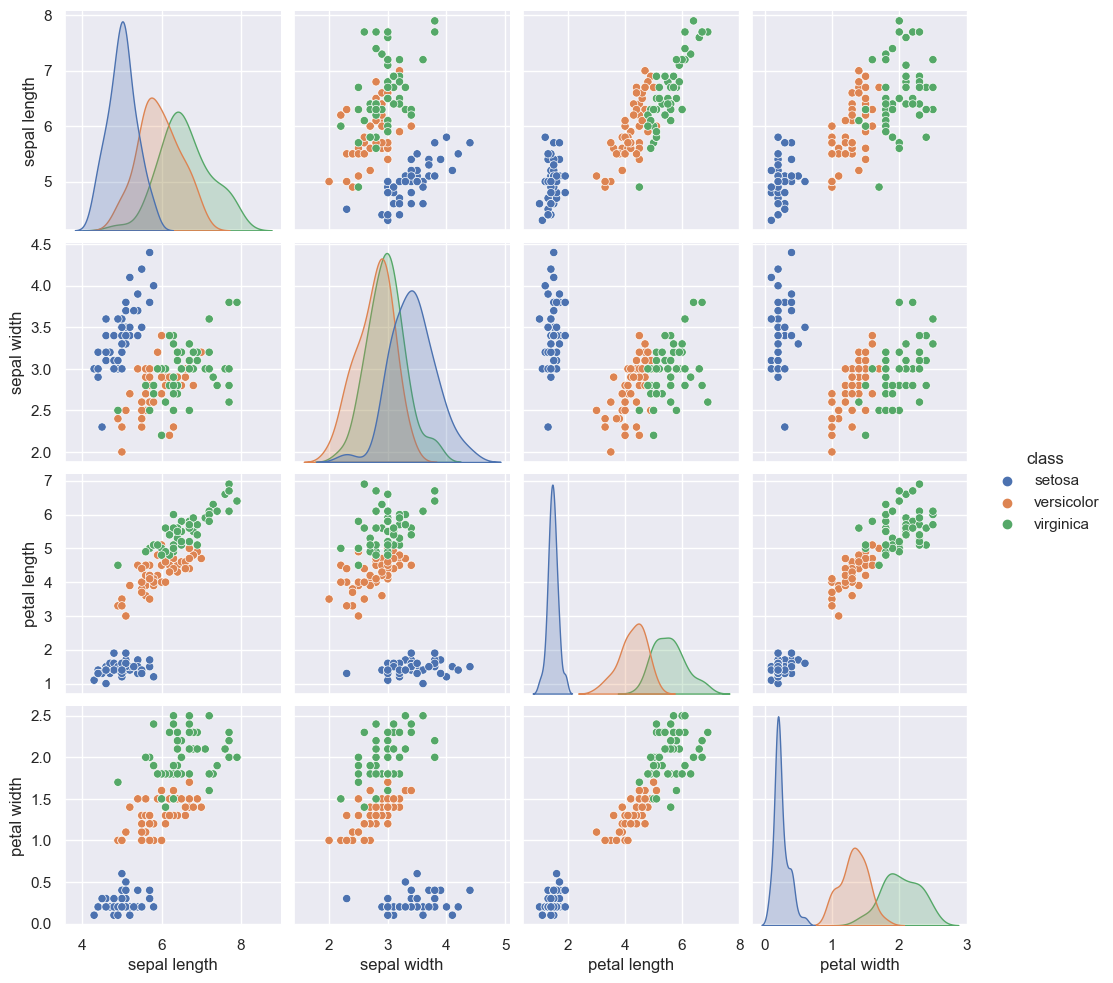

In [5]:
# Visualize the distribution of each feature and the pairwise relationships between features
sns.pairplot(df, hue='class')
plt.show()

Distribution of Features:
1. `Sepal Length`: The distribution of sepal length indicates that the Setosa species has a smaller sepal length, clustering around the 5 mark. The Versicolor and Virginia species have longer sepal lengths, with Versicolor typically falling in the middle range and Virginica having the longest sepal lengths. 
2. `Sepal Width`: The distribution of sepal width indicates that the Setosa species has a larger sepal width, clustering above the 3.5 mark. There is substantial overlap between Versicolor and Virginica speal width; however, Virginica tends to have a slighlty larger sepal width than Versicolor.
3. `Petal Length`: The distribution of petal length indciates that the Virginica species has the largest petal length, followed by Versicolor, and then Setosa. This feature demonstrates a clearer distinction between all three species. 
4. `Petal Width`: The distribution of petal width indicates that the Virginica species has the largest petal width, followed by Versicolor, and then Setosa. This feature also demonstrates a clearer distinction between all three species. 

Pairwise Relationships Between Features:
1. `Sepal Length` vs. `Sepal Width`: The Setosa species generally has a smaller sepal length and a larger sepal width. The Virginica species tends to have both a larger sepal length and width compared to Versicolor.
2. `Sepal Length` vs. `Petal Length`: While the Virginica and Versicolor species show some overlap, the Virginica species generally clusters at the higher end of both of these features with the largest sepal and petal length followed by the Versicolor species. The Setosa species clusters at the lower end of these features with the smallest sepal and petal length.
3. `Sepal Length` vs. `Petal Width`: While the Virginica and Versicolor species show some overlap, the Virginica species generally clusters at the higher end of both of these features with the largest sepal length and petal width followed by the Versicolor species. The Setosa species clusters at the lower end of these features with the smallest sepal length and petal width.
4. `Sepal Width` vs. `Petal Length`: The Setosa species falls on the higher end of sepal width and on the lower end of petal length. While the Versicolor and Virginica species show significant overlap in sepal width, Virginica tends to have a larger petal length. 
5. `Sepal Width` vs. `Petal Width`: The Setosa species falls on the higher end of sepal width and on the lower end of petal width. While the Versicolor and Virginica species show significant overlap in sepal width, Virginica tends to have a larger petal width. 
6. `Petal Length` vs. `Petal Width`: While the Versicolor and Virginica species demonsrate some overlap in both features, the Virginca species tends to have both a larger petal length and petal width. The Setosa species has the smallest petal length and petal width. 

In [6]:
# Visualize the correlation between the features
correlation_matrix = df.drop('class', axis=1).corr()
correlation_matrix

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.117570,0.871754,0.817941
sepal width,-0.117570,1.000000,-0.428440,-0.366126
petal length,0.871754,-0.428440,1.000000,0.962865
petal width,0.817941,-0.366126,0.962865,1.000000


Correlation Between the Features:
1. `Sepal Length`:
    - `Sepal Width`: There is a weak negative correlation of -0.12. This indicates that as the sepal length increases, the sepal width slightly decreases.
    - `Petal Length`: There is a strong positive correlation of 0.87. This indicates that as the sepal length increases, the petal lengths increases.
    - `Petal Width`: There is a strong positive correlation of 0.82. This indicates that as the sepal length increases, the petal width increases.
2. `Sepal Width`:
    - `Petal Length`: There is a moderate negative correlation of -0.43. This indicates that as the sepal width increases, the petal length decreases.
    - `Petal Width`: There is a weak negative correlation of -0.37. This indicates that as the sepal width increases, the petal width decreases slightly.
3. `Petal Length`:
    - `Petal Width`: There is a strong positive correlation of 0.96. This indicates that as the petal length increases, the petal width increases. 

## Question 2: Choose *K* (25 pts)

Using the cell below, build a model to predict the target in the iris dataset using the k-NN algorithm. The program should try at least 20 different values of k and evaluate the accuracy of the predictions. After which, display a line graph showing the accuracy for each value of k. Evaluate the results from the graph and recommend the best value of *k*. 

`Note:` If multiple values of *k* are found to be suitable, weigh the pros and cons of choosing a large versus a small value of *k*.

In [7]:
#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,                 # the input features
                                                    y,                 # the labels
                                                    test_size=0.3,     # set asie 30% of the data as the test set
                                                    random_state=42,   # reproduce the results
                                                    stratify=y)        # preserve the distribution of the labels

#build the k-nn model, experiment with different values of k
neighbors = range(1, 21)
accuracies = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

In [8]:
# Evaluate the accuracy of the predictions
for k, accuracy in zip(neighbors, accuracies):
    print(f'Accuracy for k={k}: {accuracy: .2f}')

Accuracy for k=1:  0.93
Accuracy for k=2:  0.91
Accuracy for k=3:  0.96
Accuracy for k=4:  0.96
Accuracy for k=5:  0.98
Accuracy for k=6:  0.93
Accuracy for k=7:  0.96
Accuracy for k=8:  0.93
Accuracy for k=9:  0.96
Accuracy for k=10:  0.96
Accuracy for k=11:  0.93
Accuracy for k=12:  0.93
Accuracy for k=13:  0.93
Accuracy for k=14:  0.93
Accuracy for k=15:  0.96
Accuracy for k=16:  0.96
Accuracy for k=17:  0.96
Accuracy for k=18:  0.96
Accuracy for k=19:  0.96
Accuracy for k=20:  0.93


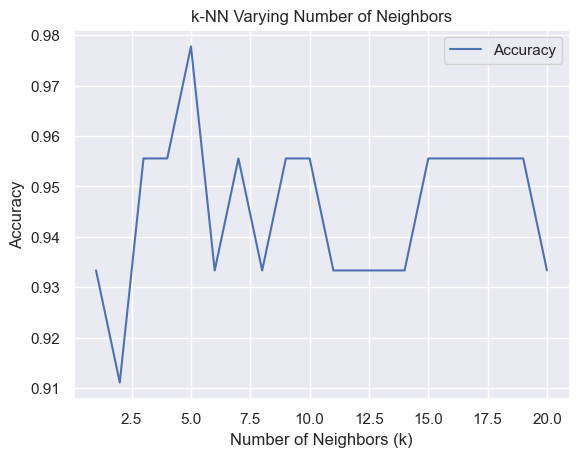

In [9]:
# Display a line graph showing the accuracy for each value of k
plt.plot(neighbors, accuracies, label='Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k-NN Varying Number of Neighbors')
plt.legend()
plt.show()

In [10]:
# Recommend the best value of k
best_k = neighbors[accuracies.index(max(accuracies))]
print(f'The best value for k is: {best_k}')

The best value for k is: 5


The graph demonstrates that the accuracy of the k-NN model fluctuates with different values of k. Based on the graph, k=5 seems to be the best value because it corresponds to the highest accuracy peak, indicating the most precise predictions for the test set given this value of k. 

## Question 3: Evaluate the Results (5 pts)
Display the classification report for your recommended value of k. Evaluate the report and explain the results. 

In [11]:
# Display the classification report for the recommended value of k (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

report = classification_report(y_test, y_pred, target_names=data.target_names)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



The classification report demonstrates that the model performed very well, with an overall accuracy of 98%. The Setosa species is perfectly classified. The Versicolor species has a high precision of 0.94 and a perfect recall of 1.00, resulting in an f1-score of 0.97. The Virginica species has perfect precision of 1.00 and a slightly lower recall of 0.93, resulting in an f1-score of 0.97. This indicates that the model is very reliable for classifying the Iris species. 

## Question 4: Model Evaluation (5 pts)
Answer the following question using a markdown cell.

1. Research the difference between accuracy, precision, and recall. For each metric, provide an example that explains when you would choose one metric over the others.
2. In the lecture we discussed one method to partition your dataset using a train-test split. Identify another approach that can be used to partition your dataset and explain how it works.

`Note``: you do not need to implement code for questions 4.1 and 4.2

1. The Difference between Accuracy, Precision, and Recall
    1. Accuracy: Shows how often a classification ML model is correct overall. 
        - In a medical test for a disease that is evenly distributed in the population, accuracy would demonstrate how often the test is correct in identifying both sick and healthy individuals. You would choose this to minimize false positives and negatives.
    2. Precision: Shows how often an ML model is correct when predicting the target class. 
        - In the same medical test, precision would focus on the subset of patients who tested positive for the disease. You would choose this when it's particularly harmful to misdiagnose a healthy person as sick.
    3. Recall: Shows whether an ML model can find all objects of the target class. 
        - In the same medical test, recall would measure how well the test identifies all sick individuals. You would choose this when it's crucial to identify every case. 
    
2. K-Fold Cross-Validation: The dataset is divided into k subsets or folds. The model is trained and evaluated k times, using a different fold as the test set each time, while the remaining k-1 folds form the training set. Performance metrics from each fold are averaged to estimate the model's generalization performance. 

## Resources / References
Share any resources that were helpful in your response for question 4. 

4.1: [Evidently AI – Classification Metrics Guide](https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall#:~:text=Accuracy%20shows%20how%20often%20a,when%20choosing%20the%20suitable%20metric.)

4.2: [Analytics Vidhya – K-Fold Cross-Validation Technique](https://www.analyticsvidhya.com/blog/2022/02/k-fold-cross-validation-technique-and-its-essentials/#:~:text=K%2Dfold%20cross%2Dvalidation%20is,estimate%20the%20model's%20generalization%20performance.)
                                                